In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

#Metrics
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,roc_auc_score


In [5]:
df=pd.read_csv(r'D:\ML_Project\train machine failure.csv')
df


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [6]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.shape

(136429, 14)

In [8]:
df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [9]:
#Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f'col',column,':',num_distinct_values,'distinct values')

col id : 136429 distinct values
col Product ID : 9976 distinct values
col Type : 3 distinct values
col Air temperature [K] : 95 distinct values
col Process temperature [K] : 81 distinct values
col Rotational speed [rpm] : 952 distinct values
col Torque [Nm] : 611 distinct values
col Tool wear [min] : 246 distinct values
col Machine failure : 2 distinct values
col TWF : 2 distinct values
col HDF : 2 distinct values
col PWF : 2 distinct values
col OSF : 2 distinct values
col RNF : 2 distinct values


In [10]:
# TWF (tool wear failure)
# HDF (heat-related failure)
# PWF (pressure-related failure)
# OSF (overload-related failure)
# RNF (random failure)
binaries = ["TWF", "HDF", "PWF", "OSF", "RNF"]
for column in binaries:
    column_values= df[column].unique()
    print(f"Values in",column,':',column_values)


Values in TWF : [0 1]
Values in HDF : [0 1]
Values in PWF : [0 1]
Values in OSF : [0 1]
Values in RNF : [0 1]


# **EDA**

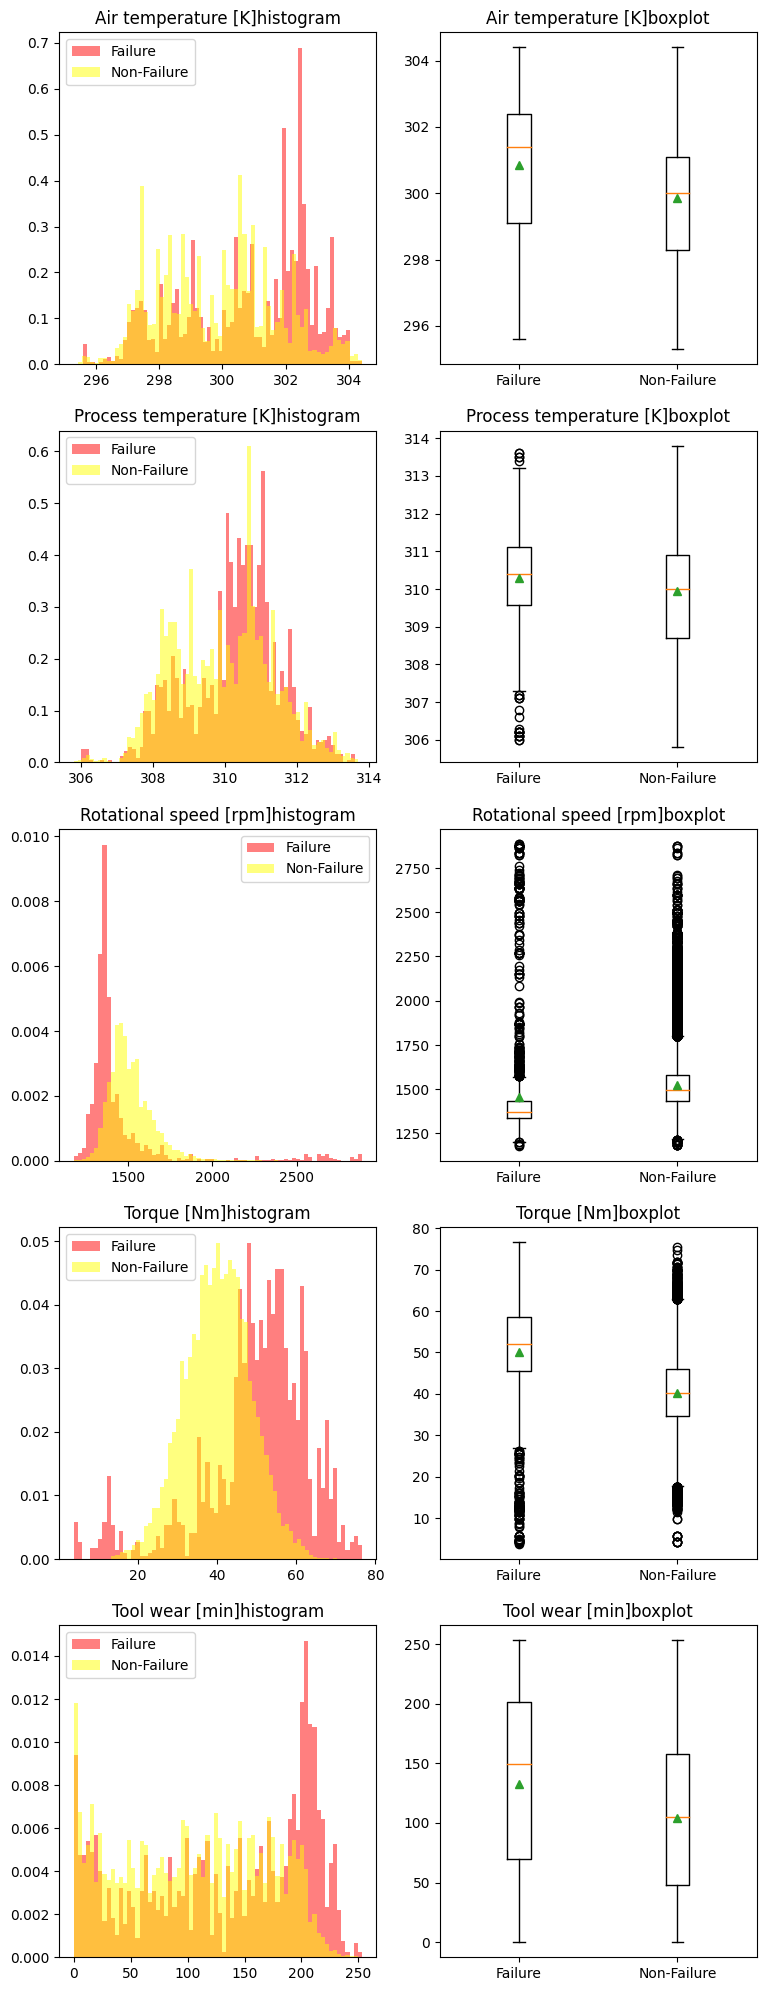

In [11]:
numerical_columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
def plot_numerical_distributions(df,features):
    fig,ax= plt.subplots(5,2,figsize=(9,25))
    for i in range(5):
        failure= df.loc[df["Machine failure"]==1,features[i]]
        non_failure= df.loc[df["Machine failure"]==0,features[i]]
        ax[i][0].hist(failure,bins=70,color="red",alpha=0.5,density=True,label="Failure")
        ax[i][0].hist(non_failure,bins=70,color="yellow",alpha=0.5,density=True,label="Non-Failure")
        ax[i][0].set_title(features[i] + "histogram")
        ax[i][0].legend()
        #boxplot
        ax[i][1].boxplot([failure, non_failure],showmeans=True)
        ax[i][1].set_xticklabels(["Failure","Non-Failure"])
        ax[i][1].set_title(features[i] + "boxplot")

plot_numerical_distributions(df,numerical_columns)




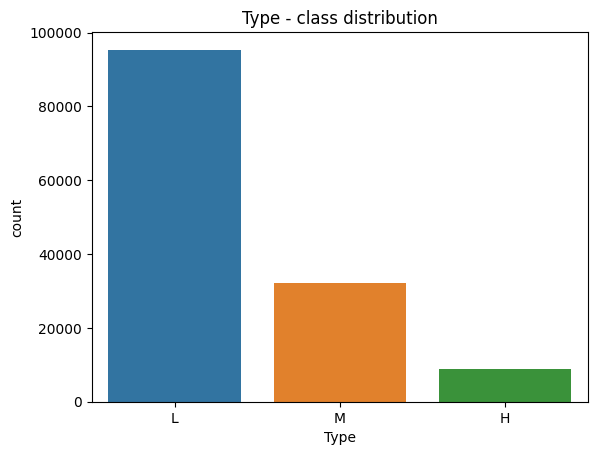

In [12]:
def plot_counts(data, feature):
    ax = sns.countplot(x=feature, data=data)
    ax.set_title(feature +  " - class distribution")
    plt.show()
plot_counts(df,'Type')

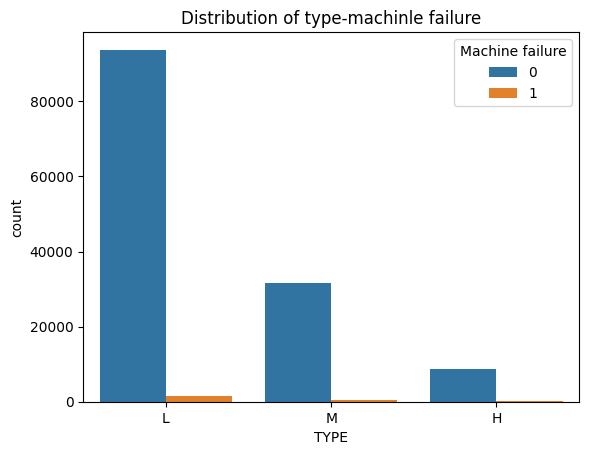

In [13]:
sns.countplot(x=df['Type'],data=df,hue='Machine failure')
plt.xlabel('TYPE')
plt.ylabel('count')
plt.title('Distribution of type-machinle failure')
plt.show()

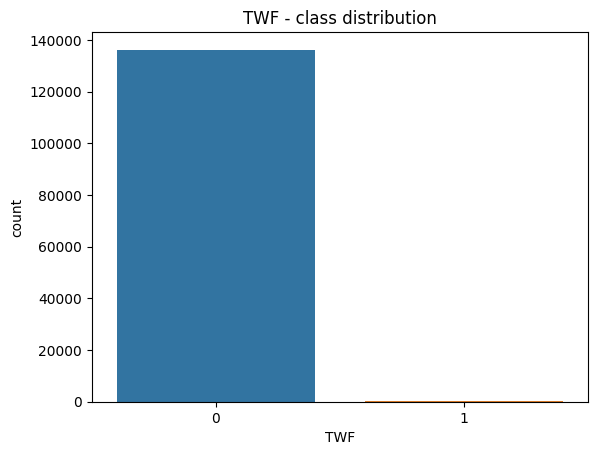

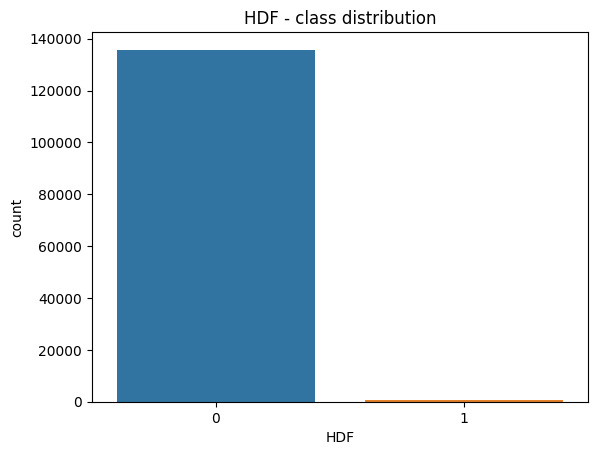

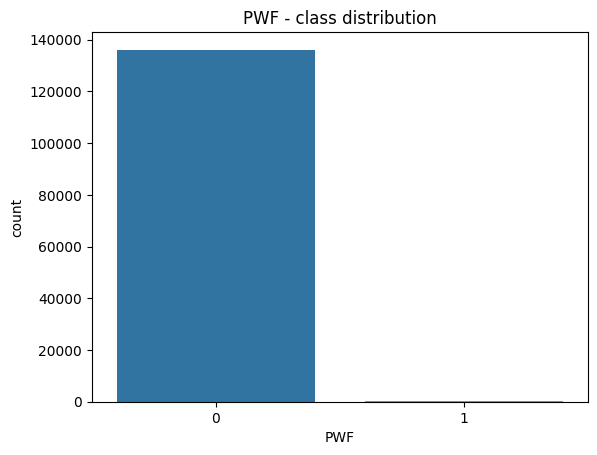

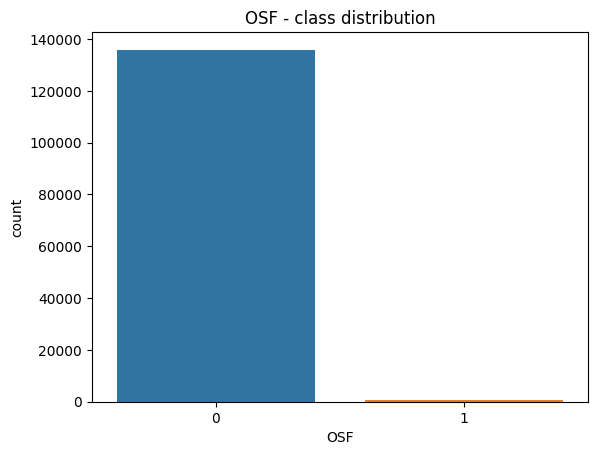

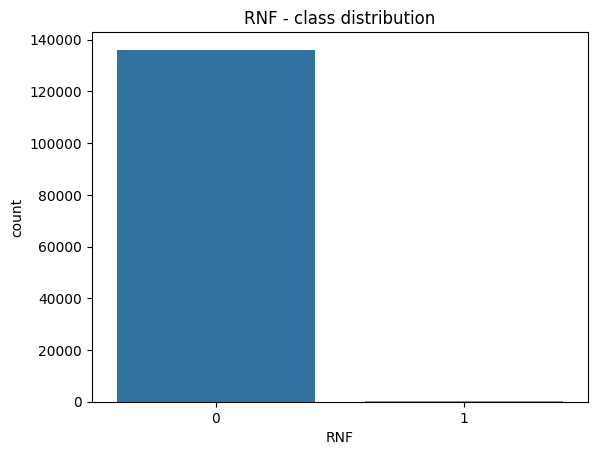

In [14]:
binaries = ["TWF","HDF","PWF","OSF","RNF"]
for i in range(len(binaries)):
    plot_counts(df, binaries[i])

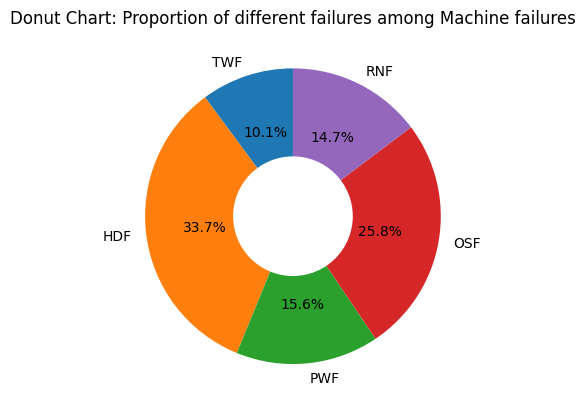

TWF    212
HDF    704
PWF    327
OSF    540
RNF    308
dtype: int64


In [15]:
failure_counts= df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(circle)
plt.title('Donut Chart: Proportion of different failures among Machine failures')
plt.show()
print(failure_counts)

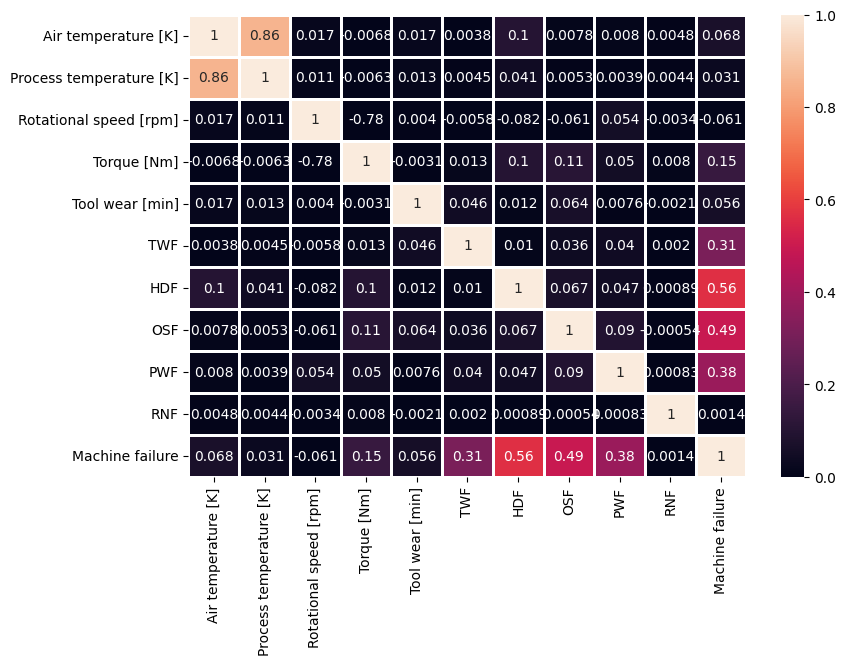

In [16]:
col=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','OSF','PWF','RNF','Machine failure']
selected_data=df[col]
correlation_col=selected_data.corr()
plt.figure(figsize=(9,6))
sns.heatmap(correlation_col,vmin=0,vmax=1,annot=True,linewidths=2)
plt.show()

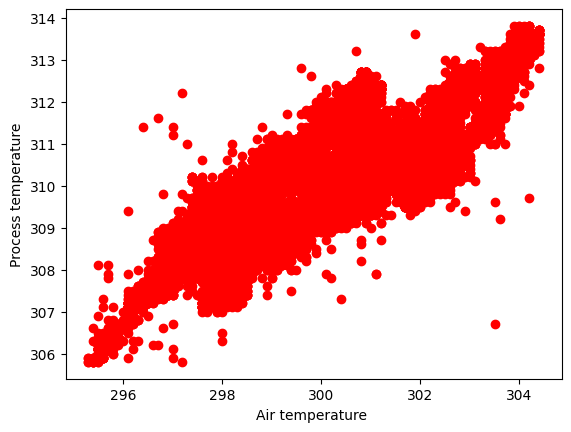

In [17]:
#Air temperature [K] vs. Process temperature [K]
plt.scatter(df["Air temperature [K]"],df["Process temperature [K]"],color='red')
plt.xlabel("Air temperature ")
plt.ylabel("Process temperature")
plt.show()

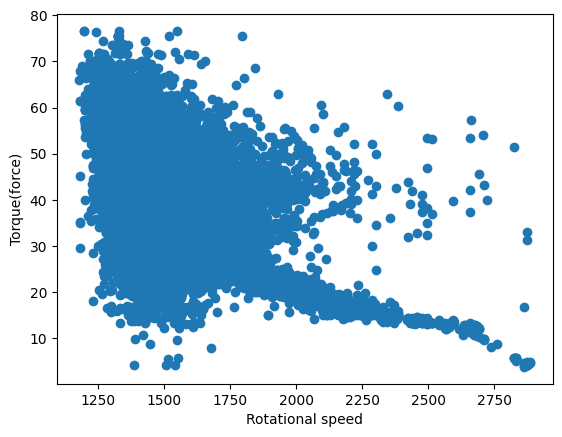

In [18]:
#Rotational speed [rpm] vs. Torque [Nm]
plt.scatter(df["Rotational speed [rpm]"],df["Torque [Nm]"])
plt.xlabel("Rotational speed")
plt.ylabel("Torque(force)")
plt.show()

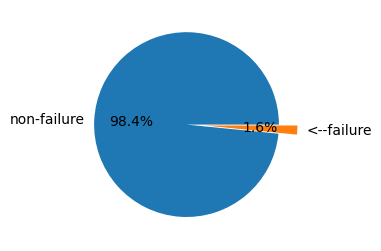

Machine failure
0    134281
1      2148
Name: count, dtype: int64


In [19]:
#IMBALANCED PIECHART
target=df['Machine failure'].value_counts()
my_labels=['non-failure','<--failure']
myexplode = [0.2, 0]
plt.figure(figsize=(3,3))
plt.pie(target,autopct='%1.1f%%', startangle=0,labels=my_labels,explode=myexplode)
plt.show()
print(target)

# **MODEL CREATION**

In [20]:
df.drop(['id','Product ID','PWF','RNF'],axis=1,inplace=True)


In [21]:
df.shape

(136429, 10)

In [22]:
le=LabelEncoder()
df['Type']=le.fit_transform(df['Type'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,OSF
0,1,300.6,309.6,1596,36.1,140,0,0,0,0
1,2,302.6,312.1,1759,29.1,200,0,0,0,0
2,1,299.3,308.5,1805,26.5,25,0,0,0,0
3,1,301.0,310.9,1524,44.3,197,0,0,0,0
4,2,298.0,309.0,1641,35.4,34,0,0,0,0


In [23]:
X=df.drop(['Machine failure'],axis=1)
y=df['Machine failure']


In [24]:
ss=StandardScaler()
x_sc=ss.fit_transform(X)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=1)

In [26]:
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
ab=AdaBoostClassifier()
knn=KNeighborsClassifier()
models=[rfc,dtc,ab,knn]
for model in models:
  print('*'*10,model,'*'*10)
  model.fit(X_train,y_train)
  us_pred=model.predict(X_test)
  print(classification_report(y_test,us_pred))
  print(roc_auc_score(y_test,us_pred))

********** RandomForestClassifier() **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40268
           1       0.95      0.71      0.81       661

    accuracy                           0.99     40929
   macro avg       0.97      0.86      0.91     40929
weighted avg       0.99      0.99      0.99     40929

0.8559803627345799
********** DecisionTreeClassifier() **********
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     40268
           1       0.70      0.73      0.72       661

    accuracy                           0.99     40929
   macro avg       0.85      0.86      0.86     40929
weighted avg       0.99      0.99      0.99     40929

0.8642981021107146
********** AdaBoostClassifier() **********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40268
           1       0.95      0.71      0.81       661

    acc

# **PCA**

In [27]:
pca=PCA(n_components=2,random_state=1)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [28]:
pca.explained_variance_ratio_

array([0.20855204, 0.2029946 ])

In [29]:
rfc_pca=RandomForestClassifier()
dtc_pca=DecisionTreeClassifier()
ab_pca=AdaBoostClassifier()
knn_pca=KNeighborsClassifier()
models_pca=[rfc_pca,dtc_pca,ab_pca,knn_pca]
for model_pca in models_pca:
  print('*'*10,model_pca,'*'*10)
  model_pca.fit(X_train_pca,y_train)
  pca_pred=model_pca.predict(X_test_pca)
  print(classification_report(y_test,pca_pred))
  print(roc_auc_score(y_test,pca_pred))

********** RandomForestClassifier() **********
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     40268
           1       0.91      0.58      0.70       661

    accuracy                           0.99     40929
   macro avg       0.95      0.79      0.85     40929
weighted avg       0.99      0.99      0.99     40929

0.7877154419399102
********** DecisionTreeClassifier() **********
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40268
           1       0.60      0.57      0.59       661

    accuracy                           0.99     40929
   macro avg       0.80      0.78      0.79     40929
weighted avg       0.99      0.99      0.99     40929

0.7835205522394811
********** AdaBoostClassifier() **********
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     40268
           1       0.89      0.57      0.70       661

    acc

# **SAMPLING:**



In [30]:
y_train.value_counts()

Machine failure
0    94013
1     1487
Name: count, dtype: int64

In [31]:
sm=SMOTE(random_state=3)
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [32]:
y_train_sm.value_counts()

Machine failure
1    94013
0    94013
Name: count, dtype: int64

In [33]:
rfc_sm=RandomForestClassifier()
dtc_sm=DecisionTreeClassifier()
ab_sm=AdaBoostClassifier()
knn_sm=KNeighborsClassifier()
models_sm=[rfc_sm,dtc_sm,ab_sm,knn_sm]
for model_sm in models_sm:
  print('*'*10,model_sm,'*'*10)
  model_sm.fit(X_train_sm,y_train_sm)
  us_pred=model_sm.predict(X_test)
  print(classification_report(y_test,us_pred))
  print(roc_auc_score(y_test,us_pred))

********** RandomForestClassifier() **********


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40268
           1       0.62      0.76      0.68       661

    accuracy                           0.99     40929
   macro avg       0.81      0.87      0.84     40929
weighted avg       0.99      0.99      0.99     40929

0.8744773669966444
********** DecisionTreeClassifier() **********
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     40268
           1       0.36      0.74      0.48       661

    accuracy                           0.97     40929
   macro avg       0.68      0.86      0.73     40929
weighted avg       0.99      0.97      0.98     40929

0.8596740717675688
********** AdaBoostClassifier() **********
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     40268
           1       0.23      0.85      0.37       661

    accuracy                           0.95     40929


In [34]:
us=RandomUnderSampler(random_state=3)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)
y_train_us.value_counts()

Machine failure
0    1487
1    1487
Name: count, dtype: int64

In [35]:
rfc_us=RandomForestClassifier()
dtc_us=DecisionTreeClassifier()
ab_us=AdaBoostClassifier()
knn_us=KNeighborsClassifier()
models_us=[rfc_us,dtc_us,ab_us,knn_us]
for model_us in models_us:
  print('*'*10,model_us,'*'*10)
  model_us.fit(X_train_us,y_train_us)
  unders_pred=model_us.predict(X_test)
  print(classification_report(y_test,unders_pred))
  print(roc_auc_score(y_test,unders_pred))


********** RandomForestClassifier() **********


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     40268
           1       0.18      0.88      0.30       661

    accuracy                           0.93     40929
   macro avg       0.59      0.91      0.63     40929
weighted avg       0.98      0.93      0.95     40929

0.9086020410601466
********** DecisionTreeClassifier() **********
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     40268
           1       0.09      0.88      0.16       661

    accuracy                           0.85     40929
   macro avg       0.54      0.86      0.54     40929
weighted avg       0.98      0.85      0.90     40929

0.8616456579044457
********** AdaBoostClassifier() **********
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     40268
           1       0.21      0.86      0.34       661

    accuracy                           0.95     40929


# **PREDICTION**

In [37]:
df_test=pd.read_csv(r'D:\ML_Project\test machine failure (1).csv')
df_test.shape

(90954, 13)

In [38]:
df_test.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [39]:
le_test=LabelEncoder()
df_test['Type']=le_test.fit_transform(df_test['Type'])
df_test.drop(['Product ID','PWF','RNF'],axis=1,inplace=True)
df_test.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,OSF
0,136429,1,302.3,311.5,1499,38.0,60,0,0,0
1,136430,1,301.7,311.0,1713,28.8,17,0,0,0
2,136431,1,301.3,310.4,1525,37.7,96,0,0,0
3,136432,2,300.1,309.6,1479,47.6,5,0,0,0
4,136433,2,303.4,312.3,1515,41.3,114,0,0,0


In [40]:
id_test= df_test['id']
df_test=df_test.drop(['id'],axis=1)

In [41]:
ss_test=StandardScaler()
pure_test=ss_test.fit_transform(df_test)

In [42]:
test_prediction_rfc_us=rfc_us.predict(pure_test)
test_prediction_ab_us=ab_us.predict(pure_test)
test_prediction_knn_us=knn_us.predict(pure_test)
test_prediction_rfc_sm=rfc_sm.predict(pure_test)
test_prediction_ab_sm=ab_sm.predict(pure_test)


In [43]:
submission_rfc_us= pd.DataFrame({'ID':id_test,'Machine failure':test_prediction_rfc_us})
submission_ab_us=pd.DataFrame({'ID':id_test,'Machine failure':test_prediction_ab_us})
submission_knn_us=pd.DataFrame({'ID':id_test,'Machine failure':test_prediction_knn_us})
submission_rfc_sm=pd.DataFrame({'ID':id_test,'Machine failure':test_prediction_rfc_sm})
submission_ab_sm=pd.DataFrame({'ID':id_test,'Machine failure':test_prediction_ab_sm})


In [44]:
submission_rfc_us['Machine failure'].value_counts()

Machine failure
0    83790
1     7164
Name: count, dtype: int64

In [45]:
submission_ab_us['Machine failure'].value_counts()

Machine failure
0    84842
1     6112
Name: count, dtype: int64

In [46]:
submission_knn_us['Machine failure'].value_counts()

Machine failure
0    84913
1     6041
Name: count, dtype: int64

In [47]:
submission_rfc_sm['Machine failure'].value_counts()

Machine failure
0    88725
1     2229
Name: count, dtype: int64

In [48]:
submission_ab_sm['Machine failure'].value_counts()

Machine failure
0    85087
1     5867
Name: count, dtype: int64

In [49]:
import joblib
# Save the trained model
joblib.dump(rfc_sm, 'rfc_model.pkl')

['rfc_model.pkl']

In [50]:
import joblib
# Save the StandardScaler to a file
joblib.dump(x_sc, 'standard_scaler.pkl')


['standard_scaler.pkl']

In [51]:


# Create and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Save the StandardScaler to a file
joblib.dump(scaler, 'standard_scaler.pkl')


['standard_scaler.pkl']